# Exploratory Data Analysis and Quality Prediction on Red Wine Data
### Dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/wine+quality)

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import warnings
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

In [2]:
# load data in pandas dataframe
df = pd.read_csv('winequality-red.csv')

First, we'll
1. check the basic information about the data
2. get statistical information of the numerical features
3. check for missing values 
4. check for duplicates
5. analyse the target variable

In [3]:
# get information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
# get statistical information about numerical columns in the dataset
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
# check for missing values
# checkn for column names that have some missing values and number of unique values in that column
df.nunique()[df.nunique() != len(df)].sort_values(ascending=False)

density                 436
chlorides               153
total sulfur dioxide    144
volatile acidity        143
sulphates                96
fixed acidity            96
residual sugar           91
pH                       89
citric acid              80
alcohol                  65
free sulfur dioxide      60
quality                   6
dtype: int64

In [6]:
# check for column names that do not have any missing values and all values are unique
df.nunique()[df.nunique()==len(df)]

Series([], dtype: int64)

In [7]:
# check for number of missing values in each column in descending order
df.isnull().sum().sort_values(ascending=False)

quality                 0
alcohol                 0
sulphates               0
pH                      0
density                 0
total sulfur dioxide    0
free sulfur dioxide     0
chlorides               0
residual sugar          0
citric acid             0
volatile acidity        0
fixed acidity           0
dtype: int64

##### Conclusion:
It seems that there are no missing values in any feature.

In [8]:
# Check for duplicates
df.duplicated().sum()

240

##### Conclusion:
There some duplicates present in the dataset. Let's remove them as we don't require redundant records for machine learning. 

In [9]:
print(f"Shape of dataset before removing duplicates: {df.shape}")
# keep = 'first':- let's keep first record and remove redundant records for that record 
df.drop_duplicates(inplace=True, keep='first')
print(f"Shape of dataset after removing duplicates: {df.shape}")

Shape of dataset before removing duplicates: (1599, 12)
Shape of dataset after removing duplicates: (1359, 12)


Now, let's check how data is distributed in target variable 'quality'

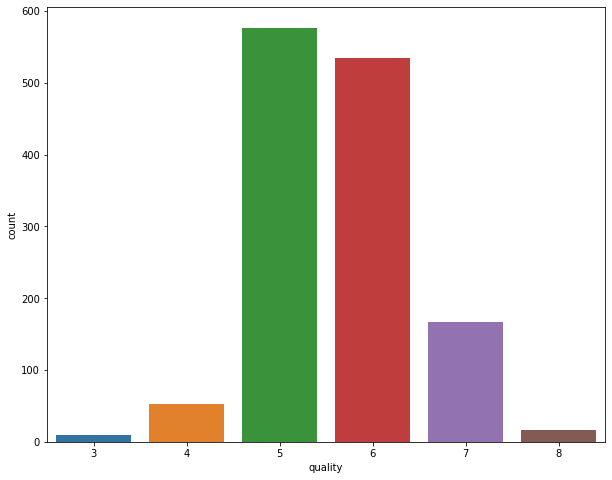

In [10]:
plt.figure(figsize=(10,8))
sns.countplot(x ='quality', data = df)
plt.show()

##### Conclusion: 
We got wine quality ranging from 3 to 8 and the data is distributed in an imbalnced manner within the range.  

## Question: 1 What are highly correlated features with respect to the target variable i.e 'quality'?

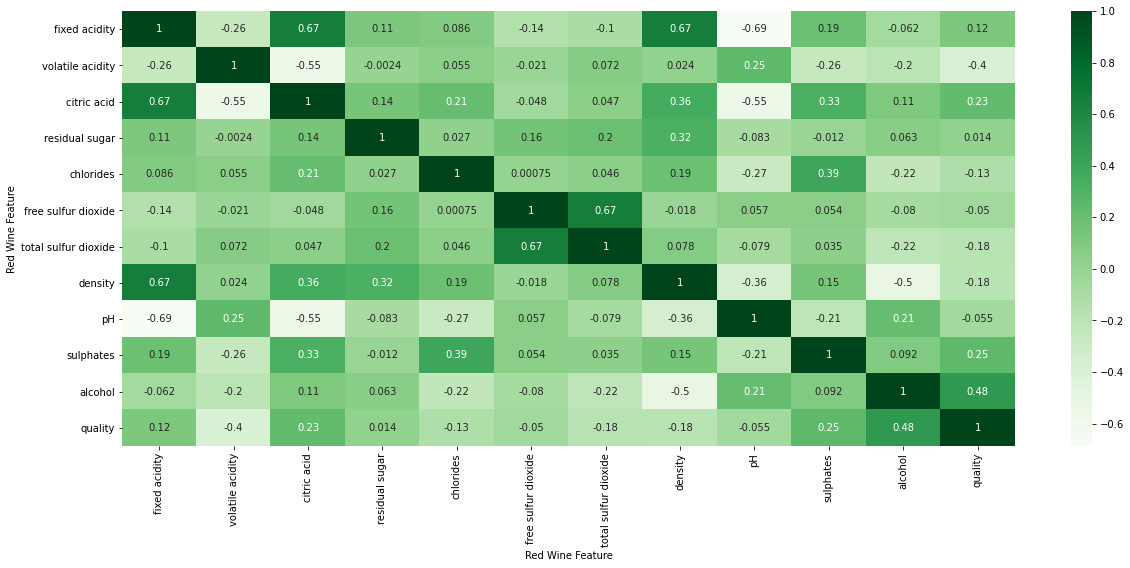

In [11]:
corr = df.corr()
plt.figure(figsize=(20,8))
sns.heatmap(corr, cmap="Greens",annot=True)
plt.xlabel('Red Wine Feature')
plt.ylabel('Red Wine Feature')
plt.show()

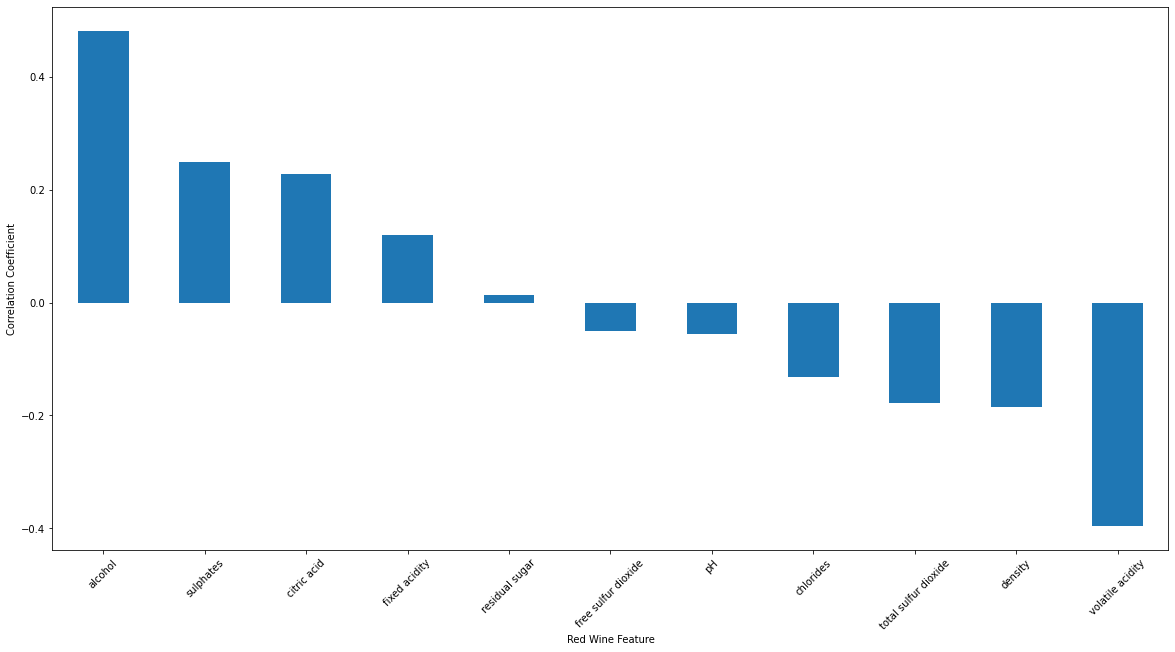

In [12]:
# let's see plot of features with respect to correlation with quality.
plt.figure(figsize=(20,10))
top_correlated_features = df.corr()['quality'].sort_values(ascending = False)[1:]
top_correlated_features.plot(kind = 'bar');
plt.xlabel('Red Wine Feature')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.show()

### Positive Correlation: 
**A positive correlation is a relationship between two variables in which both variables move in the same direction.**

From above plot we derive that following features are positively correlated with 'quality' of red wine.
1. 'alcohol'
2. 'sulphates'
3. 'citric acid' 
4. 'fixed acidity'
5. 'residual sugar'

### Negative Correlation: 
**A negative correlation is a relationship between two variables in which an increase in one variable is associated with a decrease in the other.**

From above plot we derive that following features are negatively correlated with 'quality' of red wine.
1. 'volatile acidity'
2. 'total sulfur dioxide'
3. 'density', 
4. 'chlorides'
5. 'free sulfur dioxide' 
6. 'pH'

To conclude we can say, **'alcohol', 'sulphates', 'volatile acidity' and 'density'** are 4 highly correlated features w.r.t.  'quality' of red wine.

### Question: 2 Which features are affecting the quality of wine?

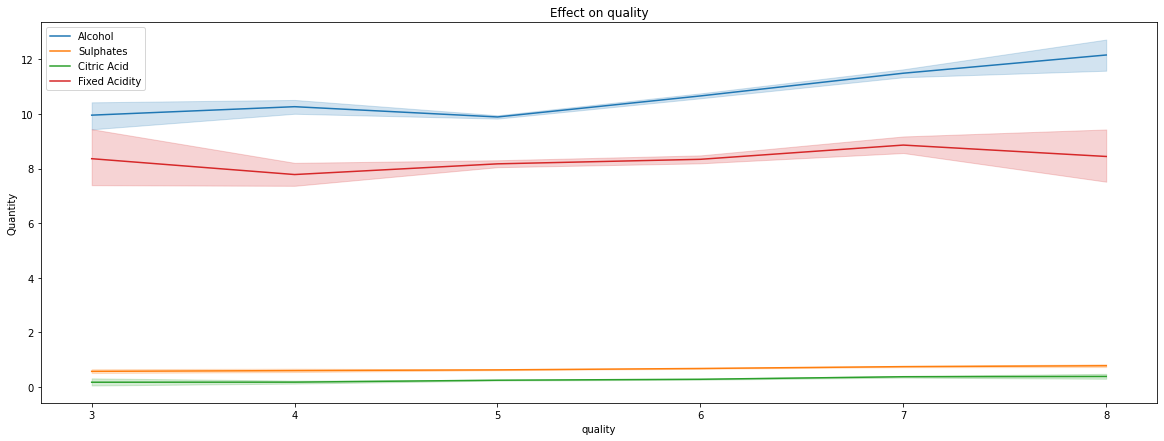

In [13]:
plt.figure(figsize=(20,7))
sns.lineplot(data=df, x="quality",y="alcohol",label="Alcohol")
sns.lineplot(data=df, x="quality",y="sulphates",label="Sulphates")
sns.lineplot(data=df, x="quality",y="citric acid",label="Citric Acid")
sns.lineplot(data=df, x="quality",y="fixed acidity",label="Fixed Acidity")

plt.ylabel("Quantity")
plt.title("Effect on quality")
plt.legend()
plt.show()

#### Conclusion:
We can see that **'alcohol', 'fixed acidity'** are affecting the quality of red wine. 

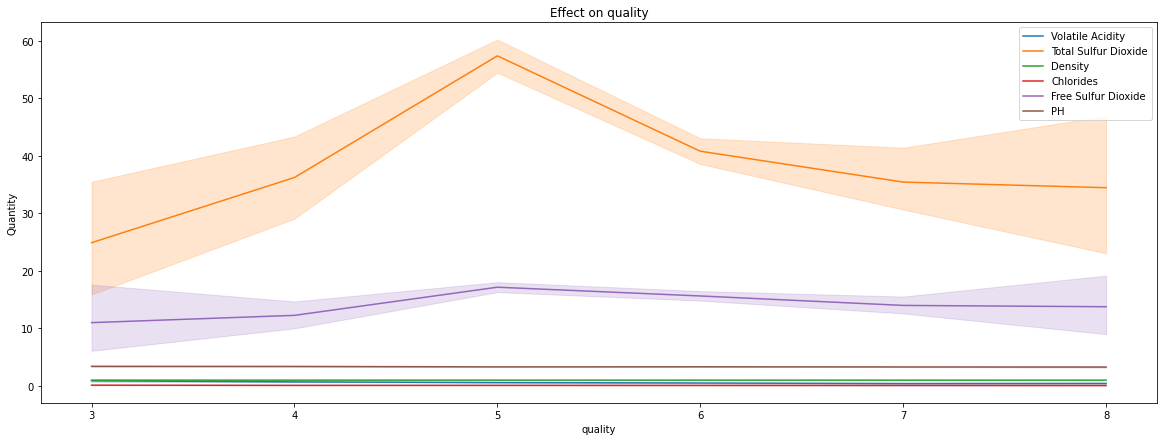

In [14]:
plt.figure(figsize=(20,7))

sns.lineplot(data=df, x="quality",y="volatile acidity",label="Volatile Acidity")
sns.lineplot(data=df, x="quality",y="total sulfur dioxide",label="Total Sulfur Dioxide")
sns.lineplot(data=df, x="quality",y="density",label="Density")
sns.lineplot(data=df, x="quality",y="chlorides",label="Chlorides")
sns.lineplot(data=df, x="quality",y="free sulfur dioxide",label="Free Sulfur Dioxide")
sns.lineplot(data=df, x="quality",y="pH",label="PH")

plt.ylabel("Quantity")
plt.title("Effect on quality")
plt.legend()
plt.show()

#### Conclusion:
We can see that **'total sulfur dioxide', 'free sulfur dioxide'** are affecting the quality of red wine. 

## Are there any outlier present in the dataset?

In [15]:
def view_feature_plots(feature):
    """
    Summary:
        utility function to plot distribution and boxplots for each feature in the dataset  
    
    Parameters:
        feature (Series): Pandas Series for given feature
    """
    plt.figure(figsize=(20, 7))
    
    # plot distribution using mean and standard deviation
    plt.subplot(1, 2, 1)
    mu, sigma = scipy.stats.norm.fit(feature)
    sns.distplot(feature) 
    plt.axvline(mu, linestyle = '-', color = 'green', label ='mean')
    plt.axvline(sigma, linestyle = '-', color = 'red', label = 'standard deviation')
    plt.title(f'{feature.name} distribution plot')

    # plot boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(feature)
    plt.title(f'{feature.name} box plot')
    plt.show()

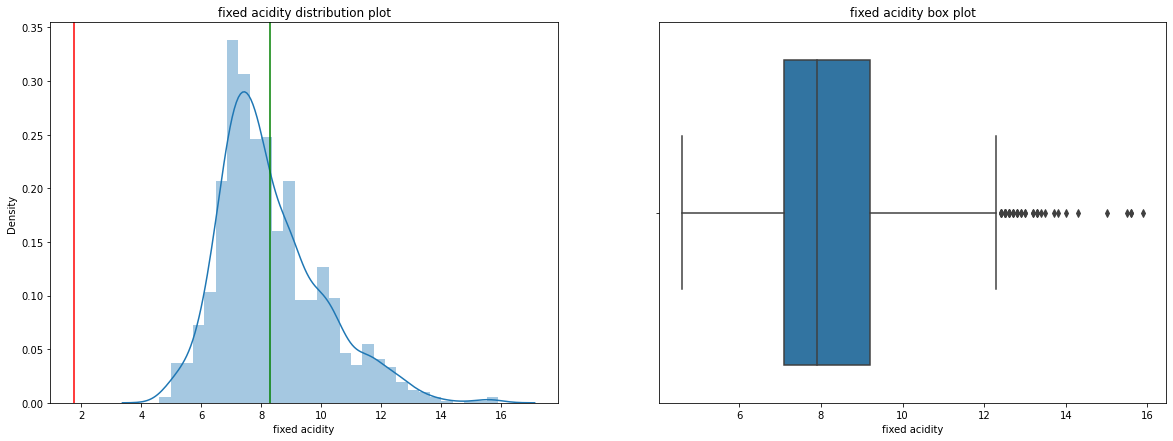

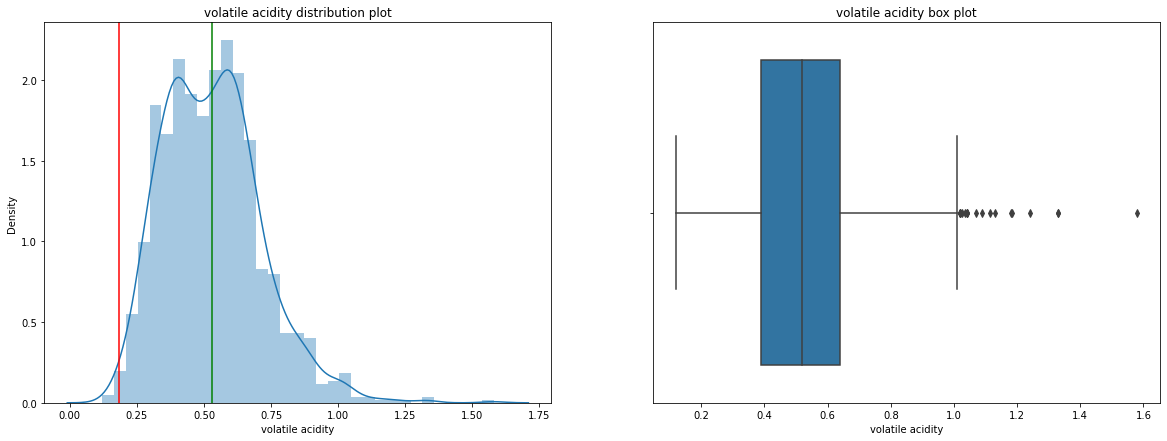

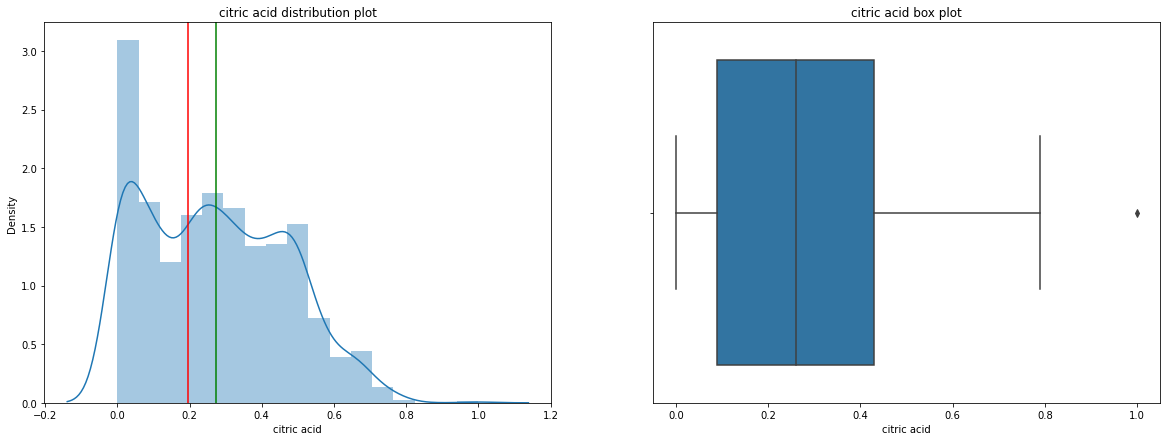

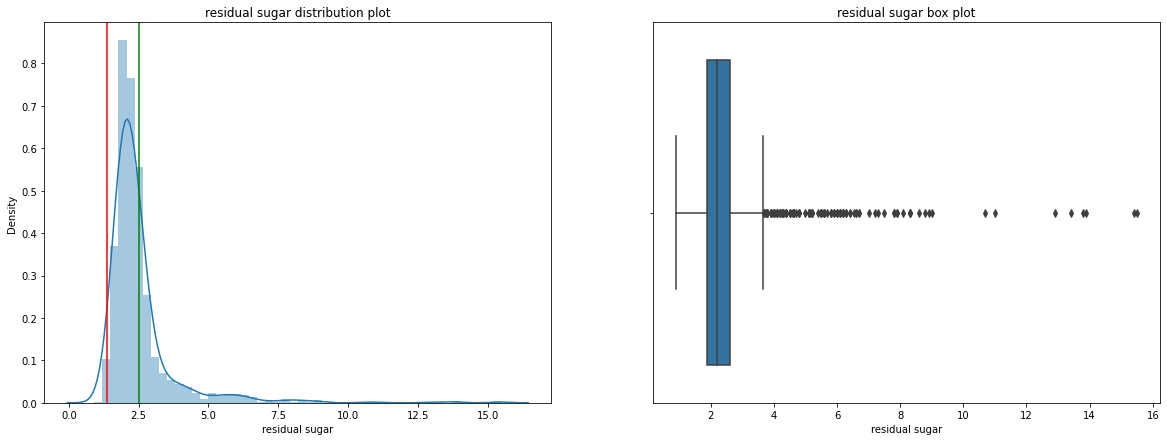

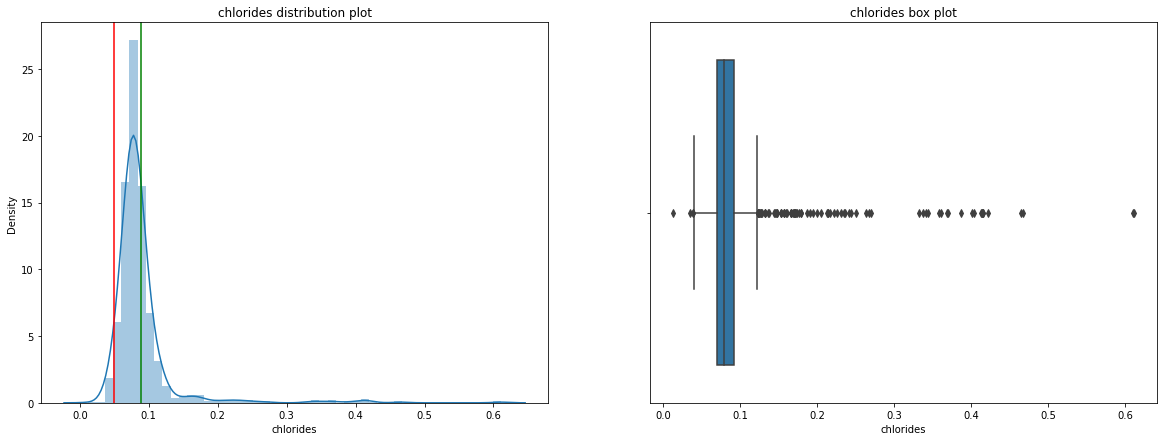

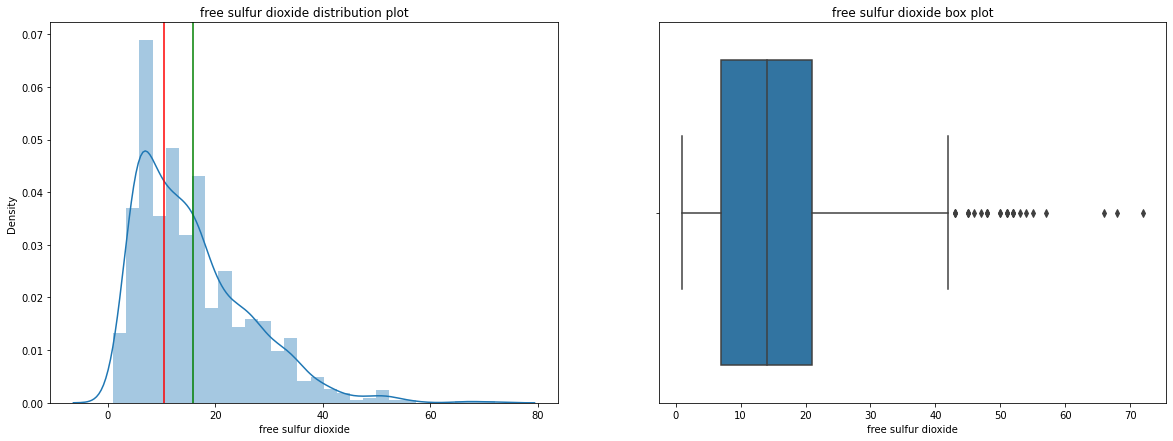

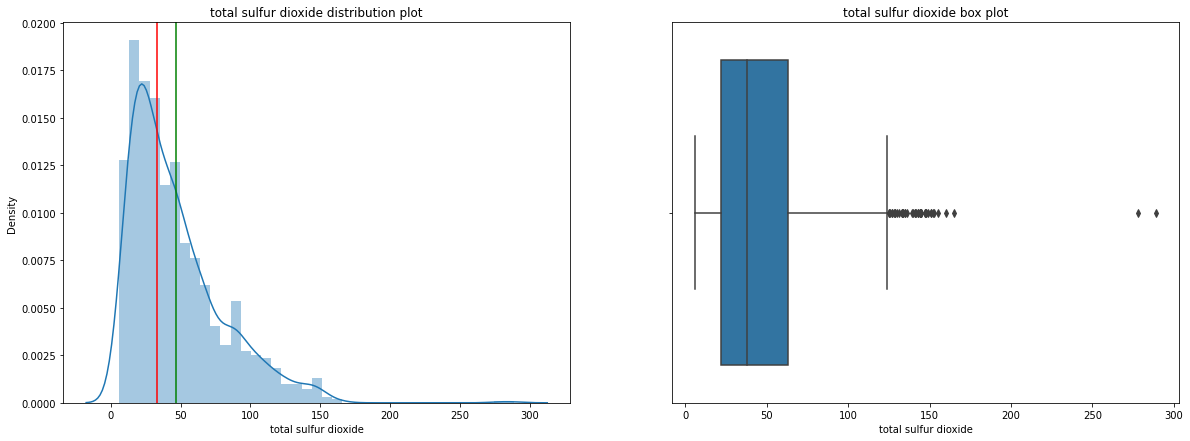

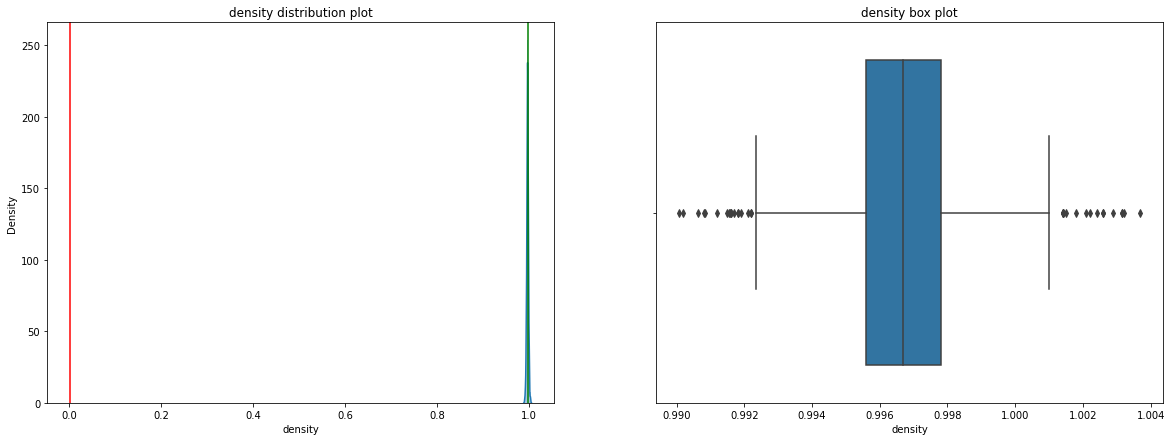

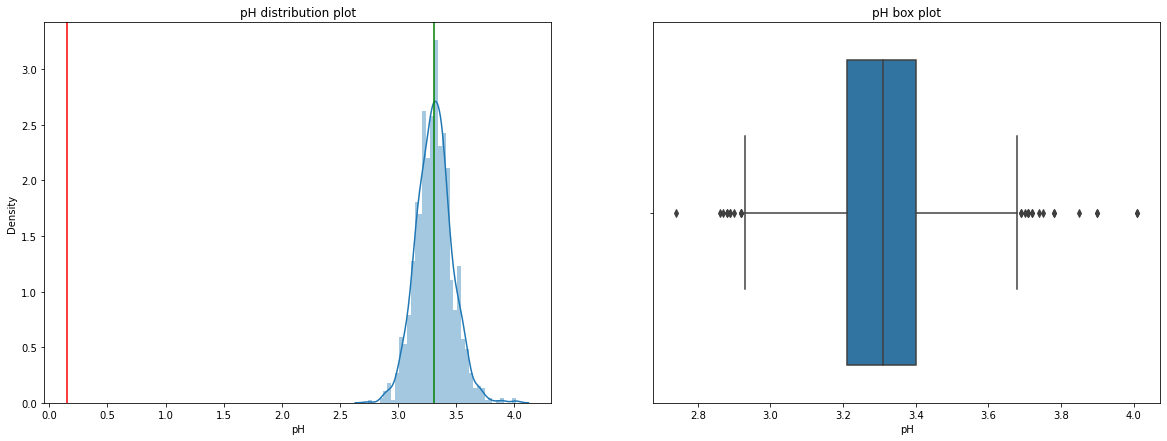

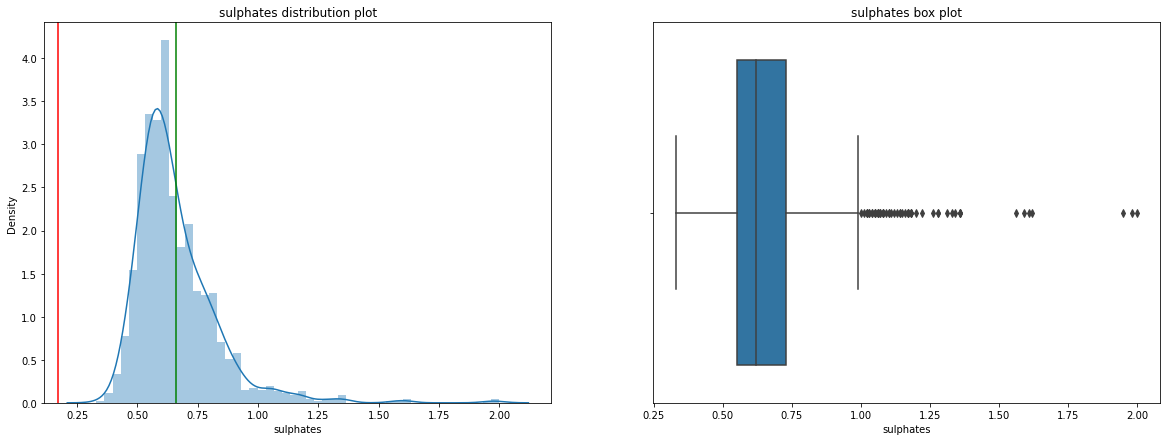

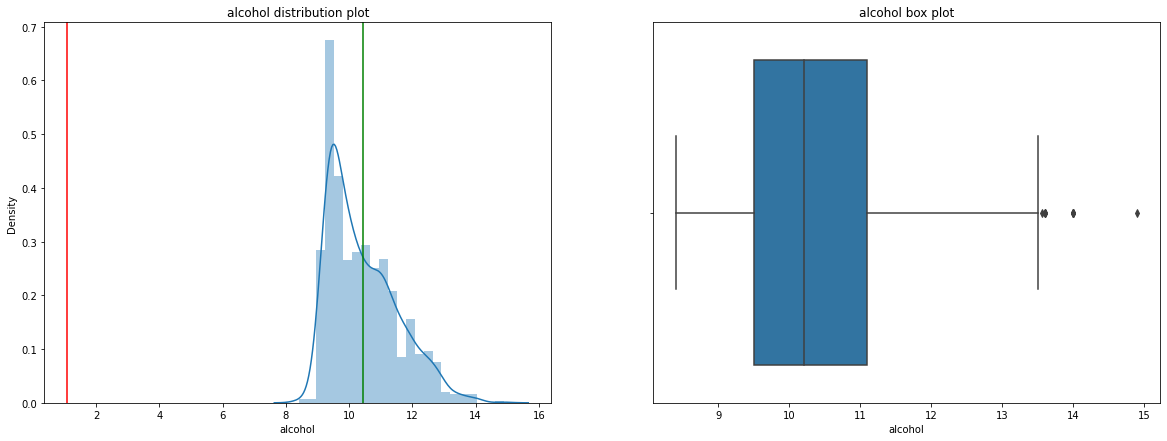

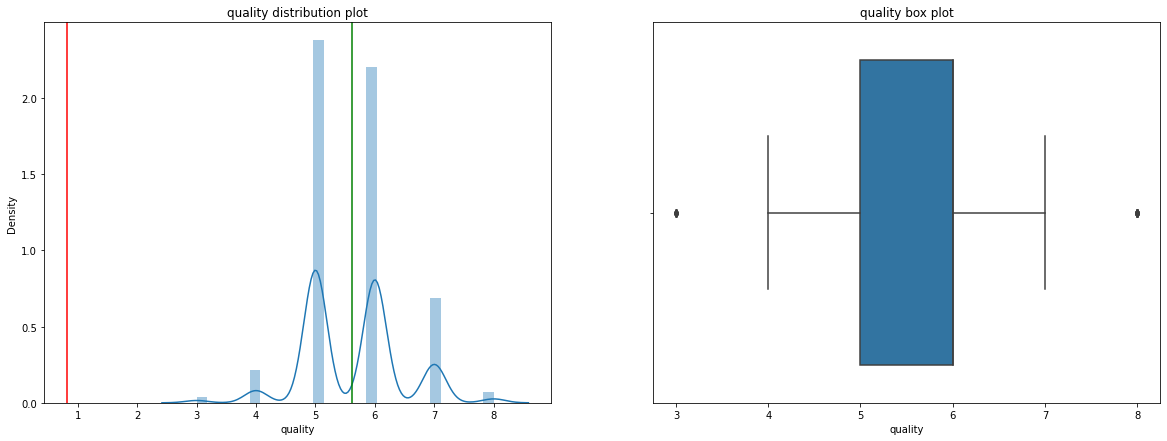

In [16]:
# all the fetaure are of dtype float64, so we can plot graphs for all
for feature in df.columns:
    view_feature_plots(df[feature])

### Game of Outliers!
#### What is an outlier?

**An outlier is a data point in a data set that is distant from all other observations. A data point that lies outside the overall distribution of the dataset.**

#### Significance of outliers:

1. Outliers badly affect mean and standard deviation of the dataset. These may statistically give erroneous results.
2. Most machine learning algorithms do not work well in the presence of outlier. So it is desirable to detect and remove outliers.

#### How to remove outliers?
1. We find data points that fall outside of 1.5 times of an interquartile range above the 3rd quartile and below the 1st quartile. 
2. Boxplots are a standardized way of displaying the distribution of data based on a five number summary ('minimum', first quartile (Q1), median, third quartile (Q3), and 'maximum').  

In [17]:
def remove_outliers(df):
    """
    Summary:
        utility function to remove outliers using inter-quartile range 
    
    Parameters:
        df (Dataframe): Pandas Series for given feature
    
    Returns:
        df_outlier_removed(Dataframe): Pandas dataframe without outliers
    """
    df_outlier_removed = df.copy()
    for i in [i for i in df_outlier_removed.columns]:
        if df_outlier_removed[i].nunique()>=12:
            Q1 = df_outlier_removed[i].quantile(0.25)
            Q3 = df_outlier_removed[i].quantile(0.75)
            IQR = Q3 - Q1
            df_outlier_removed = df_outlier_removed[df_outlier_removed[i] <= (Q3+(1.5*IQR))]
            df_outlier_removed = df_outlier_removed[df_outlier_removed[i] >= (Q1-(1.5*IQR))]
    df_outlier_removed = df_outlier_removed.reset_index(drop=True)
    print(f"Before removal of outliers, the dataset had {df.shape[0]} samples")
    print(f"After removal of outliers, the dataset has {df_outlier_removed.shape[0]} samples")
    return df_outlier_removed

In [18]:
df_outlier_removed = remove_outliers(df)

Before removal of outliers, the dataset had 1359 samples
After removal of outliers, the dataset has 985 samples


## Question 4: Can we think of building a classification model for predicting the wine quality? 
### Let's predict quality of wine by applying machine learning. We'll build a classification model. We are going to divide model building process into following sections.
1. Data Preprocessing
2. Model Training
3. Model Evaluation

### 1. Data Preprocessing

We divide wine as 'good' and 'bad' by applying binning to the target variable to make binary classificaion. Then, we split the data into train-test set in 75:25 proportion. 

In [19]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wine_df = df_outlier_removed.copy()
wine_df['quality'] = pd.cut(wine_df['quality'], bins = bins, labels = group_names)

<AxesSubplot:xlabel='quality', ylabel='count'>

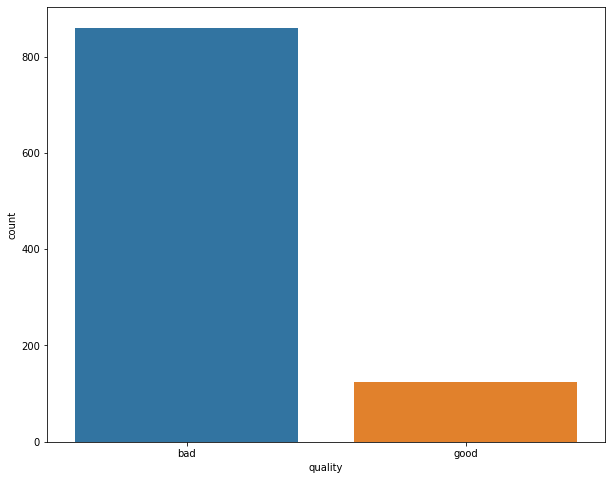

In [20]:
plt.figure(figsize=(10,8))
sns.countplot(wine_df['quality'])

In [21]:
X = wine_df.drop('quality', axis = 1)
y = wine_df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [22]:
# apply standard scaling to every numerical feature as each feature follows normal distribution
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### 3. Model Training

In [23]:
# first let's train Support Vector Machine Classifier
sv_clf = SVC()
sv_clf.fit(X_train, y_train)
sv_predictions = sv_clf.predict(X_test)
print(f"Accuracy of {sv_clf.__class__.__name__} on test data: {accuracy_score(y_test, sv_predictions)}")

Accuracy of SVC on test data: 0.8785425101214575


In [24]:
# now we train RandomForest Classifier
random_forest_clf = RandomForestClassifier(n_estimators=200)
random_forest_clf.fit(X_train, y_train)
rf_predictions = random_forest_clf.predict(X_test)
print(f"Accuracy of {random_forest_clf.__class__.__name__} on test data: {accuracy_score(y_test, rf_predictions)}")

Accuracy of RandomForestClassifier on test data: 0.8866396761133604


In [25]:
# now we train LogisticRegression Classifier
logistic_clf = LogisticRegression()
logistic_clf.fit(X_train, y_train)
logistic_predictions = logistic_clf.predict(X_test)
print(f"Accuracy of {logistic_clf.__class__.__name__} on test data: {accuracy_score(y_test, logistic_predictions)}")

Accuracy of LogisticRegression on test data: 0.902834008097166


### 4. Model Evaluation
Let's evaluate the best performing model i.e. Logistic Regression. We'll get confusion matrix and a classification report for our evaluation.

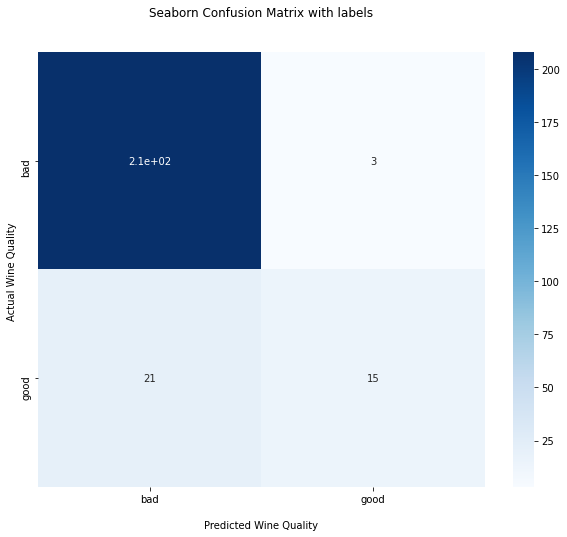

In [26]:
plt.figure(figsize=(10,8))
ax = sns.heatmap(confusion_matrix(y_test, logistic_predictions), annot=True, cmap='Blues')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Wine Quality')
ax.set_ylabel('Actual Wine Quality ');
ax.xaxis.set_ticklabels(['bad','good'])
ax.yaxis.set_ticklabels(['bad','good'])
plt.show()

In [27]:
print(classification_report(y_test, logistic_predictions))

              precision    recall  f1-score   support

         bad       0.91      0.99      0.95       211
        good       0.83      0.42      0.56        36

    accuracy                           0.90       247
   macro avg       0.87      0.70      0.75       247
weighted avg       0.90      0.90      0.89       247



#### Conclusion:
We got model accuracy as 90% on test data. Precision for 'bad' and 'good' wine quality seems high. If we check recall, it high for 'bad' wine quality. But recall for 'good' wine quality is less.